# 第5章 特征抽取

## 5.1 无监督特征抽取

### 5.1.1 主成分分析

**基础知识**

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
X[: 4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [3]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()    # ①
X_pca = pca.fit_transform(X)    # ②
np.round(X_pca[: 4], 2)    # ③

array([[-2.68,  0.32, -0.03, -0.  ],
       [-2.71, -0.18, -0.21, -0.1 ],
       [-2.89, -0.14,  0.02, -0.02],
       [-2.75, -0.32,  0.03,  0.08]])

In [4]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [5]:
pca = PCA(n_components=2)    # ④
X_pca = pca.fit_transform(X)
X_pca[: 4]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898]])

In [6]:
pca.explained_variance_ratio_.sum()

0.977685206318795

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, iris.target,
                                                   test_size=0.3, 
                                                    random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, iris.target,
                                                   test_size=0.3, 
                                                    random_state=0)
clf2 = DecisionTreeClassifier()
clf2.fit(X_train_pca, y_train_pca)
y_pred_pca = clf2.predict(X_test_pca)
accuracy2 = accuracy_score(y_test_pca, y_pred_pca)

print("dataset with 4 features: ", accuracy)
print("dataset with 2 features: ", accuracy2)

dataset with 4 features:  0.9777777777777777
dataset with 2 features:  0.9111111111111111


**项目案例**

In [8]:
from scipy.io import loadmat
path = "/Users/qiwsir/Documents/Codes/DataSet"
mnist = loadmat(path + "/mnist/mnist-original.mat")
mnist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

In [9]:
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
mnist_data.shape

(70000, 784)

In [10]:
pca = PCA(.95)    # ⑤
lower_dimensional_data = pca.fit_transform(mnist_data)
pca.n_components_

154

In [11]:
lower_dimensional_data.shape

(70000, 154)

Text(0.5, 1.0, '特征抽取后的图')

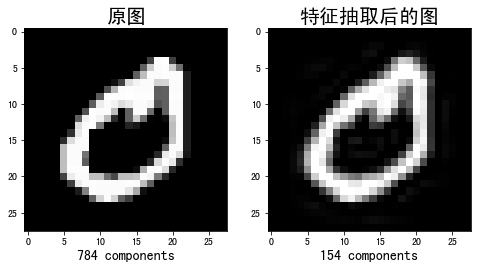

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

iverse_data = pca.inverse_transform(lower_dimensional_data)

plt.figure(figsize=(8,4));

# 原图
plt.subplot(1, 2, 1);
plt.imshow(mnist_data[1].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('原图', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(iverse_data[1].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('特征抽取后的图', fontsize = 20)

In [14]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
import pandas as pd

path = "/Users/qiwsir/Documents/Codes/DataSet"
mnist = loadmat(path + "/mnist/mnist-original.mat")
mnist_data = mnist["data"].T
mnist_label = mnist["label"][0]
train_img, test_img, train_lbl, test_lbl = train_test_split(mnist_data, mnist_label, test_size=1/7.0, random_state=0)

scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)
def logistic_reg(exp_var): 
    #global train_img, test_img
    pca = PCA(exp_var)
    pca.fit(train_img)
    lr = LogisticRegression(solver = 'lbfgs')
    lr.fit(pca.transform(train_img), train_lbl)
    lbl_pred = lr.predict(pca.transform(test_img))
    acc = accuracy_score(test_lbl, lbl_pred)
    return pca.n_components_, acc
v, n, a, t = [], [], [], []
for i in [None, 0.99, 0.95, 0.90, 0.85]:
    start = time.time()
    components, accuracy = logistic_reg(i)
    stop = time.time()
    deltat = stop - start
    v.append(i)
    n.append(components)
    a.append(accuracy)
    t.append(deltat)

df = pd.DataFrame({"Var_ratio":v, 
                   "N_components":n, 
                   "Accuracy": a,
                   "Times": t})
df


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Library/Fram

,Var_ratio,N_components,Accuracy,Times
0,NaN,784,0.9155,49.220857
1,0.99,541,0.9161,41.537929
2,0.95,330,0.9199,32.422703
3,0.90,236,0.9169,26.099979
4,0.85,184,0.9154,21.952859


**动手练习**

In [15]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [16]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

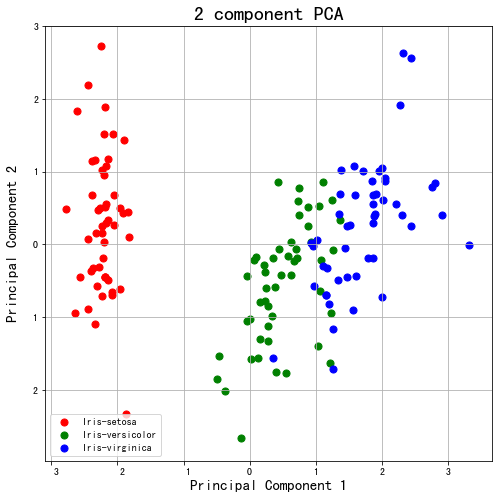

In [19]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [20]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

### 5.1.2 因子分析

**基础知识**

In [21]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis()    # ⑥
iris_fa = fa.fit(iris.data)
fa.components_    # ⑦

array([[ 0.70698856, -0.15800499,  1.65423609,  0.70084996],
       [ 0.115161  ,  0.15963548, -0.04432109, -0.01403039],
       [-0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        ,  0.        ,  0.        , -0.        ]])

In [22]:
fa = FactorAnalysis(n_components=2)
iris_two = fa.fit_transform(iris.data)
iris_two[: 4]

array([[-1.32761727, -0.56131076],
       [-1.33763854, -0.00279765],
       [-1.40281483,  0.30634949],
       [-1.30104274,  0.71882683]])

Text(0.5, 1.0, 'Factor Analysis 2 Components')

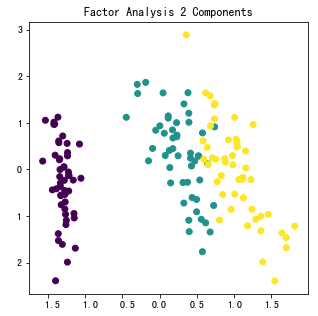

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(iris_two[:,0], iris_two[:, 1], c=iris.target)
ax.set_title("Factor Analysis 2 Components")

Text(0.5, 1.0, 'PCA 2 Components')

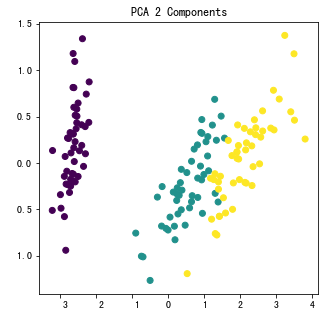

In [24]:
f = plt.figure(figsize=(5, 5))
ax = f.add_subplot(111)
ax.scatter(X_pca[:,0], X_pca[:, 1], c=iris.target)
ax.set_title("PCA 2 Components")

**项目案例**

In [25]:
import pandas as pd
path = "/Users/qiwsir/Documents/Codes/DataSet"
df = pd.read_csv(path + "/bfi/bfi.csv")
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [26]:
df.drop(['Unnamed: 0', 'gender', 'education', 'age'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 25 columns):
A1    2784 non-null float64
A2    2773 non-null float64
A3    2774 non-null float64
A4    2781 non-null float64
A5    2784 non-null float64
C1    2779 non-null float64
C2    2776 non-null float64
C3    2780 non-null float64
C4    2774 non-null float64
C5    2784 non-null float64
E1    2777 non-null float64
E2    2784 non-null float64
E3    2775 non-null float64
E4    2791 non-null float64
E5    2779 non-null float64
N1    2778 non-null float64
N2    2779 non-null float64
N3    2789 non-null float64
N4    2764 non-null float64
N5    2771 non-null float64
O1    2778 non-null float64
O2    2800 non-null int64
O3    2772 non-null float64
O4    2786 non-null float64
O5    2780 non-null float64
dtypes: float64(24), int64(1)
memory usage: 547.0 KB


In [27]:
df.dropna(inplace=True)

In [28]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18170.96635086924, 0.0)

In [29]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8485397221949221

In [30]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)      # ⑧
fa.fit(df, 25)                                             # ⑨
ev, v = fa.get_eigenvalues()    
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

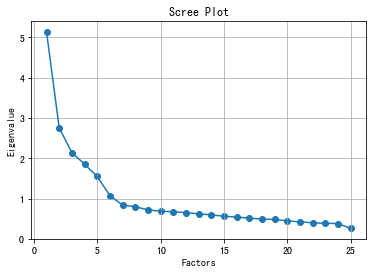

In [31]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()

**动手练习**

In [32]:
fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(df)
fa.transform(df)

array([[-0.43983042,  0.10389656, -1.21671279, -0.69621532, -1.519449  ],
       [ 0.08436922,  0.55931085, -0.60152092, -0.18934143, -0.24838424],
       [ 0.5205342 ,  0.31823461,  0.02564572, -0.75113556,  0.20450298],
       ...,
       [-0.22326681,  0.72116924,  0.78710981, -1.05847977,  0.92510305],
       [ 0.9205205 ,  0.7493374 ,  0.07095309, -2.13514505,  0.67346016],
       [-1.68998315, -1.35240274, -0.08143349, -1.85488923, -0.16387988]])